In [1]:
from src.powerspectrum import PowerSpectrum
import config as CONFIG 

import numpy as np 
import pandas as pd
import matplotlib.pylab as plt 
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [2]:
pkcalc = PowerSpectrum(CONFIG.ZMIN, CONFIG.ZMAX, CONFIG.KMIN, CONFIG.KMAX)

In [15]:
inputs = {'omega_cdm': 0.12,
         'omega_b': 0.020,
         'ln10^{10}A_s': 2.7,
         'n_s': 1.0,
         'h': 0.70,
          'M_tot': 0.05,
         'c_min': 2.55}

In [16]:
pk_lin, pk_non = pkcalc.pk_calculation(inputs, 0)

### Load Predictions from Rory

In [31]:
lin = pd.read_csv('data/predictionLinearTest.csv', index_col=[0])
non = pd.read_csv('data/predictionsNonLinearTest.csv', index_col=[0])

In [33]:
pk_lin_pred = np.exp(lin.iloc[:,7:].values)
pk_non_pred = np.exp(non.iloc[:,7:].values)

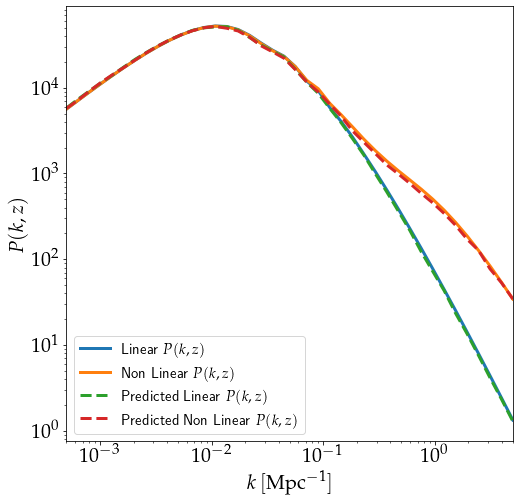

In [37]:
plt.figure(figsize = (8, 8))
plt.loglog(pkcalc.wavenumber, pk_lin, label = 'Linear $P(k,z)$', lw = 3)
plt.loglog(pkcalc.wavenumber, pk_non, label = 'Non Linear $P(k,z)$', lw = 3)
plt.loglog(pkcalc.wavenumber, pk_lin_pred[0], label = 'Predicted Linear $P(k,z)$', linestyle = '--', lw = 3)
plt.loglog(pkcalc.wavenumber, pk_non_pred[0], label = 'Predicted Non Linear $P(k,z)$', linestyle = '--', lw = 3)
plt.xlim(pkcalc.k_min, pkcalc.k_max)
plt.ylabel(r'$P(k,z)$', fontsize = fontSize)
plt.xlabel(r'$k\,[\textrm{Mpc}^{-1}]$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
# plt.savefig('plots/predicted_pk.pdf', bbox_inches = 'tight')
plt.show()

# Generate the Training Points

In [1]:
from trainingpoints import calculate_power_spectrum

In [2]:
# cosmo, linear, nonlinear = calculate_power_spectrum('lhs_8000', 0)

# Split Points into Train and Test

In [8]:
import numpy as np 
from sklearn.model_selection import train_test_split
import utils.helpers as hp

In [9]:
cosmologies = hp.load_csv('data', 'cosmologies_lhs_8000')

In [10]:
cosmologies.head()

,0,1,2,3,4,5,6
0,0.321862,0.020876,2.365299,1.095350,0.692025,0.758554,2.746491
1,0.340145,0.022639,2.697753,0.806988,0.784152,0.380711,2.925226
2,0.226900,0.022026,2.879396,1.125872,0.745988,0.363099,2.688424
3,0.160225,0.022887,3.178516,0.926398,0.671363,0.219715,2.557889
4,0.185565,0.021318,4.258425,1.115256,0.678582,0.272564,2.609840


In [11]:
pk_lin = hp.load_csv('data', 'pk_linear_lhs_8000')
pk_non = hp.load_csv('data', 'pk_nonlinear_lhs_8000')

In [12]:
pk_lin.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,630.938696,816.292511,1055.483088,1363.597015,1759.464766,2266.152115,2911.114102,3725.489229,4742.290282,5992.036698,...,944.735464,604.746820,379.977570,234.816332,142.973620,85.907540,51.011001,29.969967,17.441083,10.063101
1,2797.597931,3381.286284,4084.413936,4929.584920,5942.356049,7149.772824,8580.184093,10258.956056,12203.623046,14417.451607,...,693.110537,416.807765,245.828051,142.503178,81.346234,45.803548,25.477405,14.017416,7.637010,4.124342
2,1448.039563,1885.203349,2451.761602,3183.739947,4124.987563,5327.433016,6849.682442,8752.509640,11091.734405,13907.047780,...,983.093838,617.092489,381.283295,232.294622,139.758360,83.145819,48.970159,28.582082,16.546808,9.508918
3,8683.124028,10767.574483,13328.615663,16456.550127,20244.185377,24778.317609,30121.621596,36292.645453,43240.950024,50813.456444,...,488.501235,285.876440,165.096959,94.224235,53.207900,29.761535,16.504701,9.082281,4.962847,2.694607
4,8764.683573,11372.672705,14735.324366,19052.443966,24559.928211,31525.747071,40231.824933,50942.912860,63860.666015,79056.989985,...,2994.959538,1849.724076,1126.209090,677.024711,402.383205,236.723968,137.993560,79.778189,45.778519,26.091173


In [13]:
pk_non.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,630.930229,816.274453,1055.444808,1363.516321,1759.295631,2265.799830,2910.385934,3723.999165,4739.282897,5986.083832,...,2027.054544,1628.859333,1288.653234,989.575735,732.691964,523.748440,363.512588,246.356388,163.661469,106.840736
1,2797.557337,3381.205982,4084.255657,4929.274067,5941.747916,7148.588602,8577.891075,10254.548900,12195.237329,14401.714497,...,2105.734497,1703.312236,1347.632614,1027.657786,751.004881,527.554396,358.856093,237.941295,154.418369,98.325533
2,1448.014599,1885.149044,2451.644648,3183.490249,4124.458827,5326.322941,6847.374285,8747.766827,11082.135132,13887.999363,...,2770.242863,2248.761410,1778.318997,1353.846800,989.312008,697.160160,477.313048,319.381379,209.600663,135.204689
3,8683.004882,10767.306303,13328.032969,16455.316000,20241.624236,24773.096437,30111.159231,36272.054562,43201.228268,50738.605077,...,2331.219113,1825.620845,1381.427586,1005.011495,704.087779,477.541499,315.402322,203.756240,129.160318,80.517786
4,8764.022422,11371.283520,14732.415592,19046.378554,24547.347542,31499.835057,40178.960480,50836.455332,63650.042833,78650.153034,...,13270.345285,10242.929615,7462.829361,5168.560215,3461.569663,2270.650629,1462.555489,924.634358,573.927973,350.056583


In [14]:
X_train, X_test, y_train, y_test = train_test_split(cosmologies, pk_lin, test_size=0.2, random_state=42)
X_train_non, X_test_non, y_train_non, y_test_non = train_test_split(cosmologies, pk_non, test_size=0.2, random_state=42)

In [16]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train_non.reset_index(drop=True, inplace=True)
X_test_non.reset_index(drop=True, inplace=True)
y_train_non.reset_index(drop=True, inplace=True)
y_test_non.reset_index(drop=True, inplace=True)

In [17]:
y_train_trans = np.log(y_train.values)
y_test_trans = np.log(y_test.values)

y_train_trans_non = np.log(y_train_non.values)
y_test_trans_non = np.log(y_test_non.values)

In [19]:
hp.save_list(X_train, 'data', 'x_train')
hp.save_list(X_test, 'data', 'x_test')
hp.save_list(y_train_trans, 'data', 'y_train')
hp.save_list(y_test_trans, 'data', 'y_test')

In [20]:
hp.save_list(X_train_non, 'data', 'x_train_non')
hp.save_list(X_test_non, 'data', 'x_test_non')
hp.save_list(y_train_trans_non, 'data', 'y_train_non')
hp.save_list(y_test_trans_non, 'data', 'y_test_non')

# Load Test Points

In [1]:
import utils.helpers as hp
import pandas as pd

import matplotlib.pylab as plt 
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [2]:
X_test = hp.load_list('data', 'x_test')

In [3]:
y_test = hp.load_list('data', 'y_test')

In [4]:
predictions = pd.read_csv('data/predictions_2.csv')

In [5]:
diff = y_test - predictions.y.values

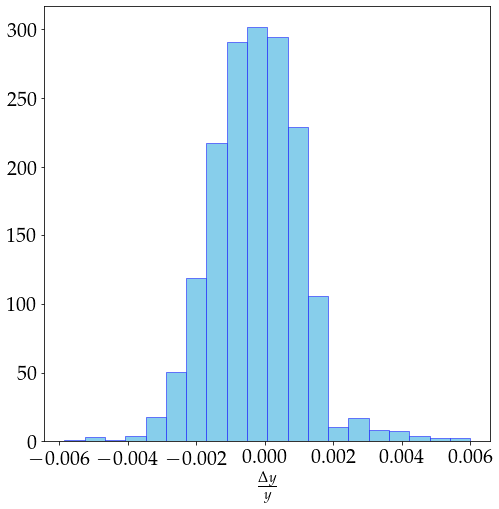

In [7]:
plt.figure(figsize = (8,8))
plt.hist(diff/y_test, density = True, bins = 20, edgecolor='blue', linewidth=0.5, color = 'skyblue')
plt.xlabel(r'$\frac{\Delta y}{y}$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
# plt.savefig('plots/fractional_error_2.pdf', bbox_inches = 'tight')
plt.show()

# Predictions 

All values of $k$ (fixed redshift)

In [19]:
import utils.helpers as hp
import pandas as pd
import numpy as np 

import matplotlib.pylab as plt 
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [2]:
y_test_lin = hp.load_list('data', 'y_test')
y_test_non = hp.load_list('data', 'y_test_non')

In [12]:
pred_lin = pd.read_csv('data/predictionsLinear.csv', index_col=[0])

In [15]:
y_test_lin.shape

(1600, 40)

In [17]:
pred_lin.head()

,x1,x2,x3,x4,x5,x6,x7,y0,y1,y2,...,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39
0,0.175060,0.020528,3.823625,1.249184,0.674381,0.457878,2.330554,8.101160,8.398612,8.680564,...,7.757158,7.301659,6.816884,6.358254,5.837420,5.364834,4.853459,4.324287,3.798110,3.312015
1,0.247204,0.023780,3.807044,0.741119,0.656892,0.440670,2.249236,9.946207,10.109417,10.294836,...,7.095523,6.534108,5.962889,5.386752,4.811654,4.201127,3.562263,2.957889,2.324677,1.692250
2,0.135376,0.021847,2.606946,1.093839,0.769223,0.798154,3.003137,7.775326,8.046071,8.280967,...,5.237594,4.737518,4.227088,3.687009,3.146649,2.593613,2.051080,1.464480,0.868221,0.335235
3,0.381697,0.023120,4.368257,0.829222,0.804653,0.425774,3.069523,9.306089,9.503856,9.699297,...,8.409770,7.950171,7.400755,6.898537,6.329370,5.763796,5.190597,4.618807,4.010365,3.398940
4,0.201674,0.021312,4.931976,1.070731,0.799900,0.886861,2.629254,9.650824,9.888880,10.142846,...,8.340364,7.859331,7.343067,6.845646,6.320633,5.767626,5.238238,4.685838,4.084520,3.559081


In [20]:
for i in range(40):
    truth = y_test_lin[:,i]
    pred = pred_lin['y'+str(i)].values
    diff = truth - pred
    frac = diff/truth 
    
    print(np.mean(frac))
    print(np.std(frac))
    print('-'*20)

5.7178090647502336e-05
0.0013456100402952512
--------------------
-0.00024754449786250544
0.0012879705035087159
--------------------
-3.31467149979562e-05
0.001240098234998058
--------------------
-0.0003486525257915922
0.0012319424931553444
--------------------
0.00015360035225147774
0.0011340897598104275
--------------------
0.00019984603524797874
0.0008292438611015324
--------------------
0.00015712622688510275
0.0007661621847543955
--------------------
-6.452717885233274e-05
0.0006862429920569861
--------------------
-0.00010506317402034945
0.0005572418336295398
--------------------
-3.7718595376368565e-06
0.00040884058833056926
--------------------
0.00011509387088457309
0.0004025594187939311
--------------------
-0.00026848573603228655
0.0006172905626142271
--------------------
0.00030065937552669556
0.0007037028358623849
--------------------
0.00024055562912710232
0.0009720821477609614
--------------------
-0.0008508455945105106
0.0015053976290871672
--------------------
-0.0003